In [1]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import pschitt.vizualisation as viz
from importlib import reload
import math

In [2]:
import pschitt.dataset as ds

In [3]:
import pschitt

In [4]:
%matplotlib inline

### Produce a simple shower

In [5]:
shower = sky.shower()

shower.impact_point = np.array([100,100,0])

#shower direction
shower.alt = math.radians(70)
shower.az = math.radians(90)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [6]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [25]:
# Simplified case with no noise and a minimal trigger set at 0
trigger_intensity = 0.
noise = 0

### Set a telescope array pointing in the shower direction (on-axis)

In [7]:
alltel = geo.load_telescopes(ds.get('CTA_paranal.txt'))

100 telescopes loaded


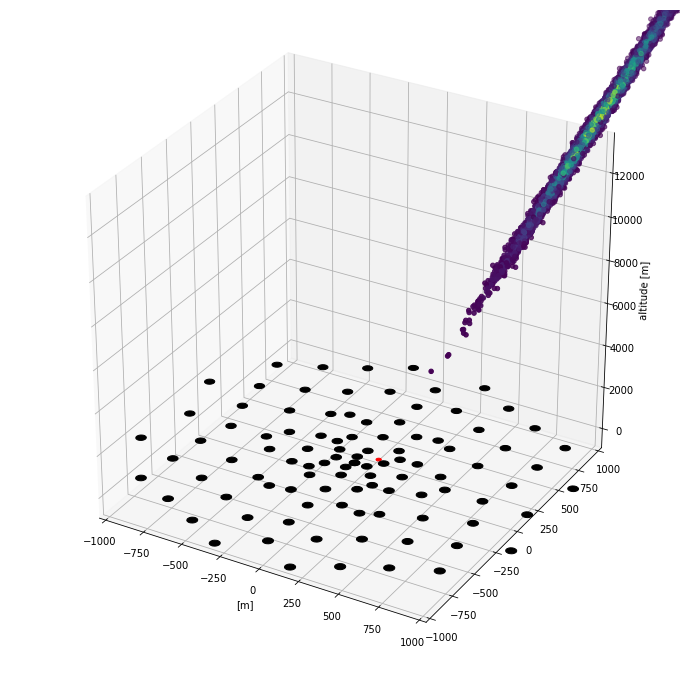

In [8]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)

## Site Map

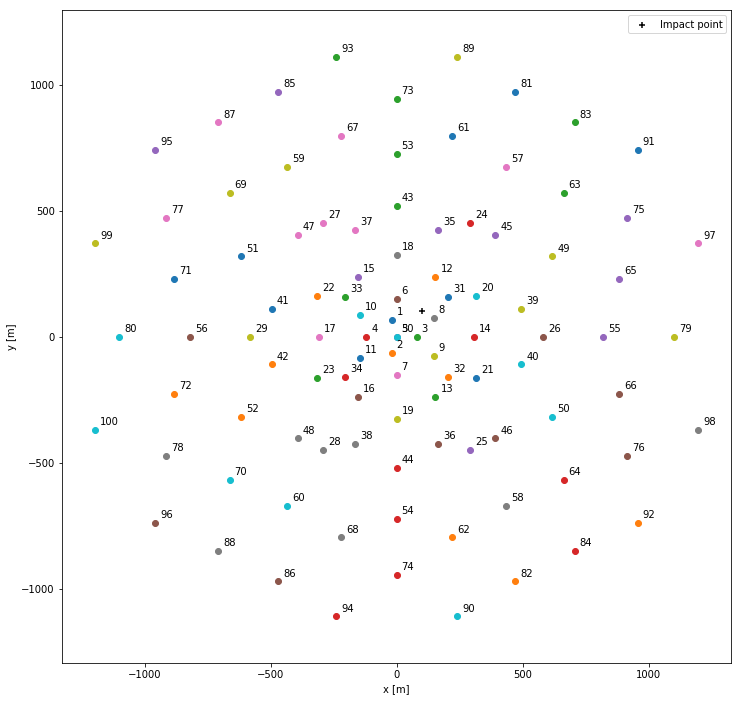

In [9]:
_,ax = plt.subplots(figsize=(12,12))
ax = viz.plot_array(alltel)
ax.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")
ax.legend()

# On-axis pointing

In [ ]:
for tel in alltel:
    tel.normal = geo.altaz_to_normal(shower.alt, shower.az)

In [11]:
ci.array_shower_imaging(shower, alltel, noise)

In [12]:
triggered_telescopes = [tel for tel in alltel if tel.signal_hist.sum()>trigger_intensity]
print("{} telescopes triggered".format(len(triggered_telescopes)))

39 telescopes triggered


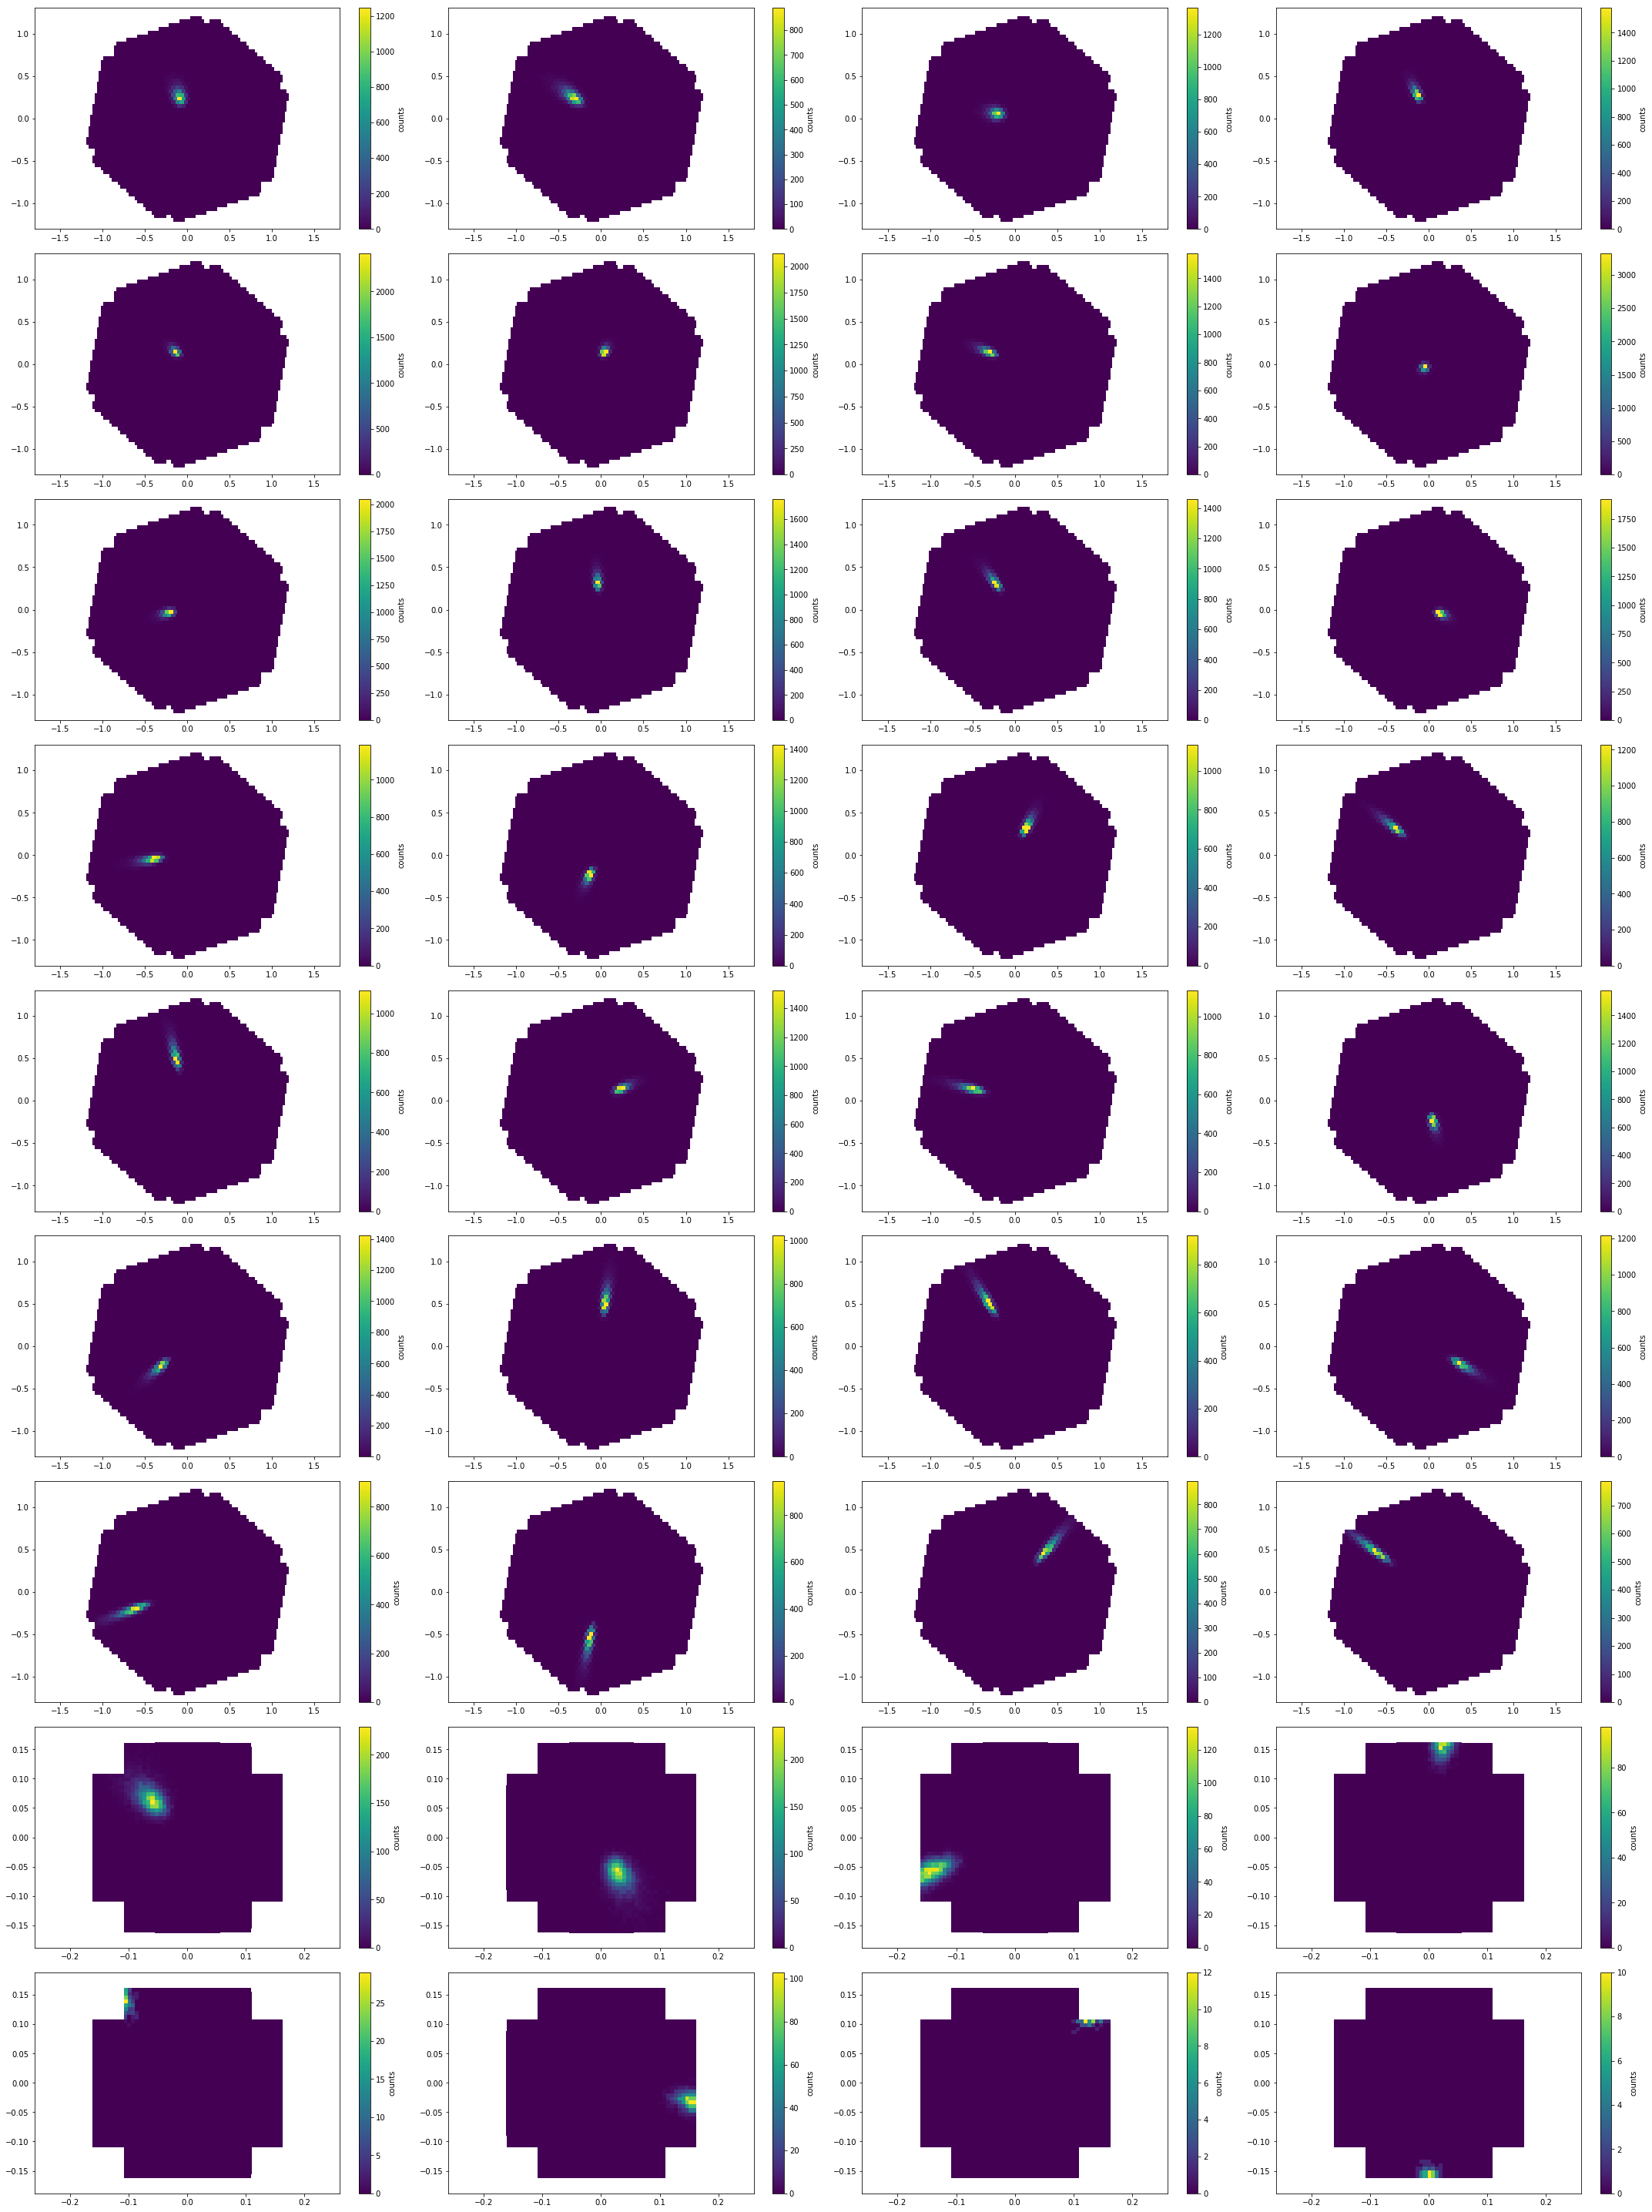

In [13]:
fig, axes = plt.subplots(len(triggered_telescopes)//4, 4, figsize=(30,40))
plt.tight_layout()
for ax,tel in zip(axes.flatten(),triggered_telescopes):
    ax = viz.display_camera_image(tel, ax=ax, s=81, marker='s')


# Off-axis pointing

In [14]:
# pointing direction off-axis
talt = math.radians(72)
taz = math.radians(89)


In [15]:
for tel in alltel:
    tel.normal = geo.altaz_to_normal(talt, taz)

In [16]:
ci.array_shower_imaging(shower, alltel, noise)

In [17]:
triggered_telescopes = [tel for tel in alltel if tel.signal_hist.sum()>trigger_intensity]
print("{} telescopes triggered".format(len(triggered_telescopes)))

40 telescopes triggered


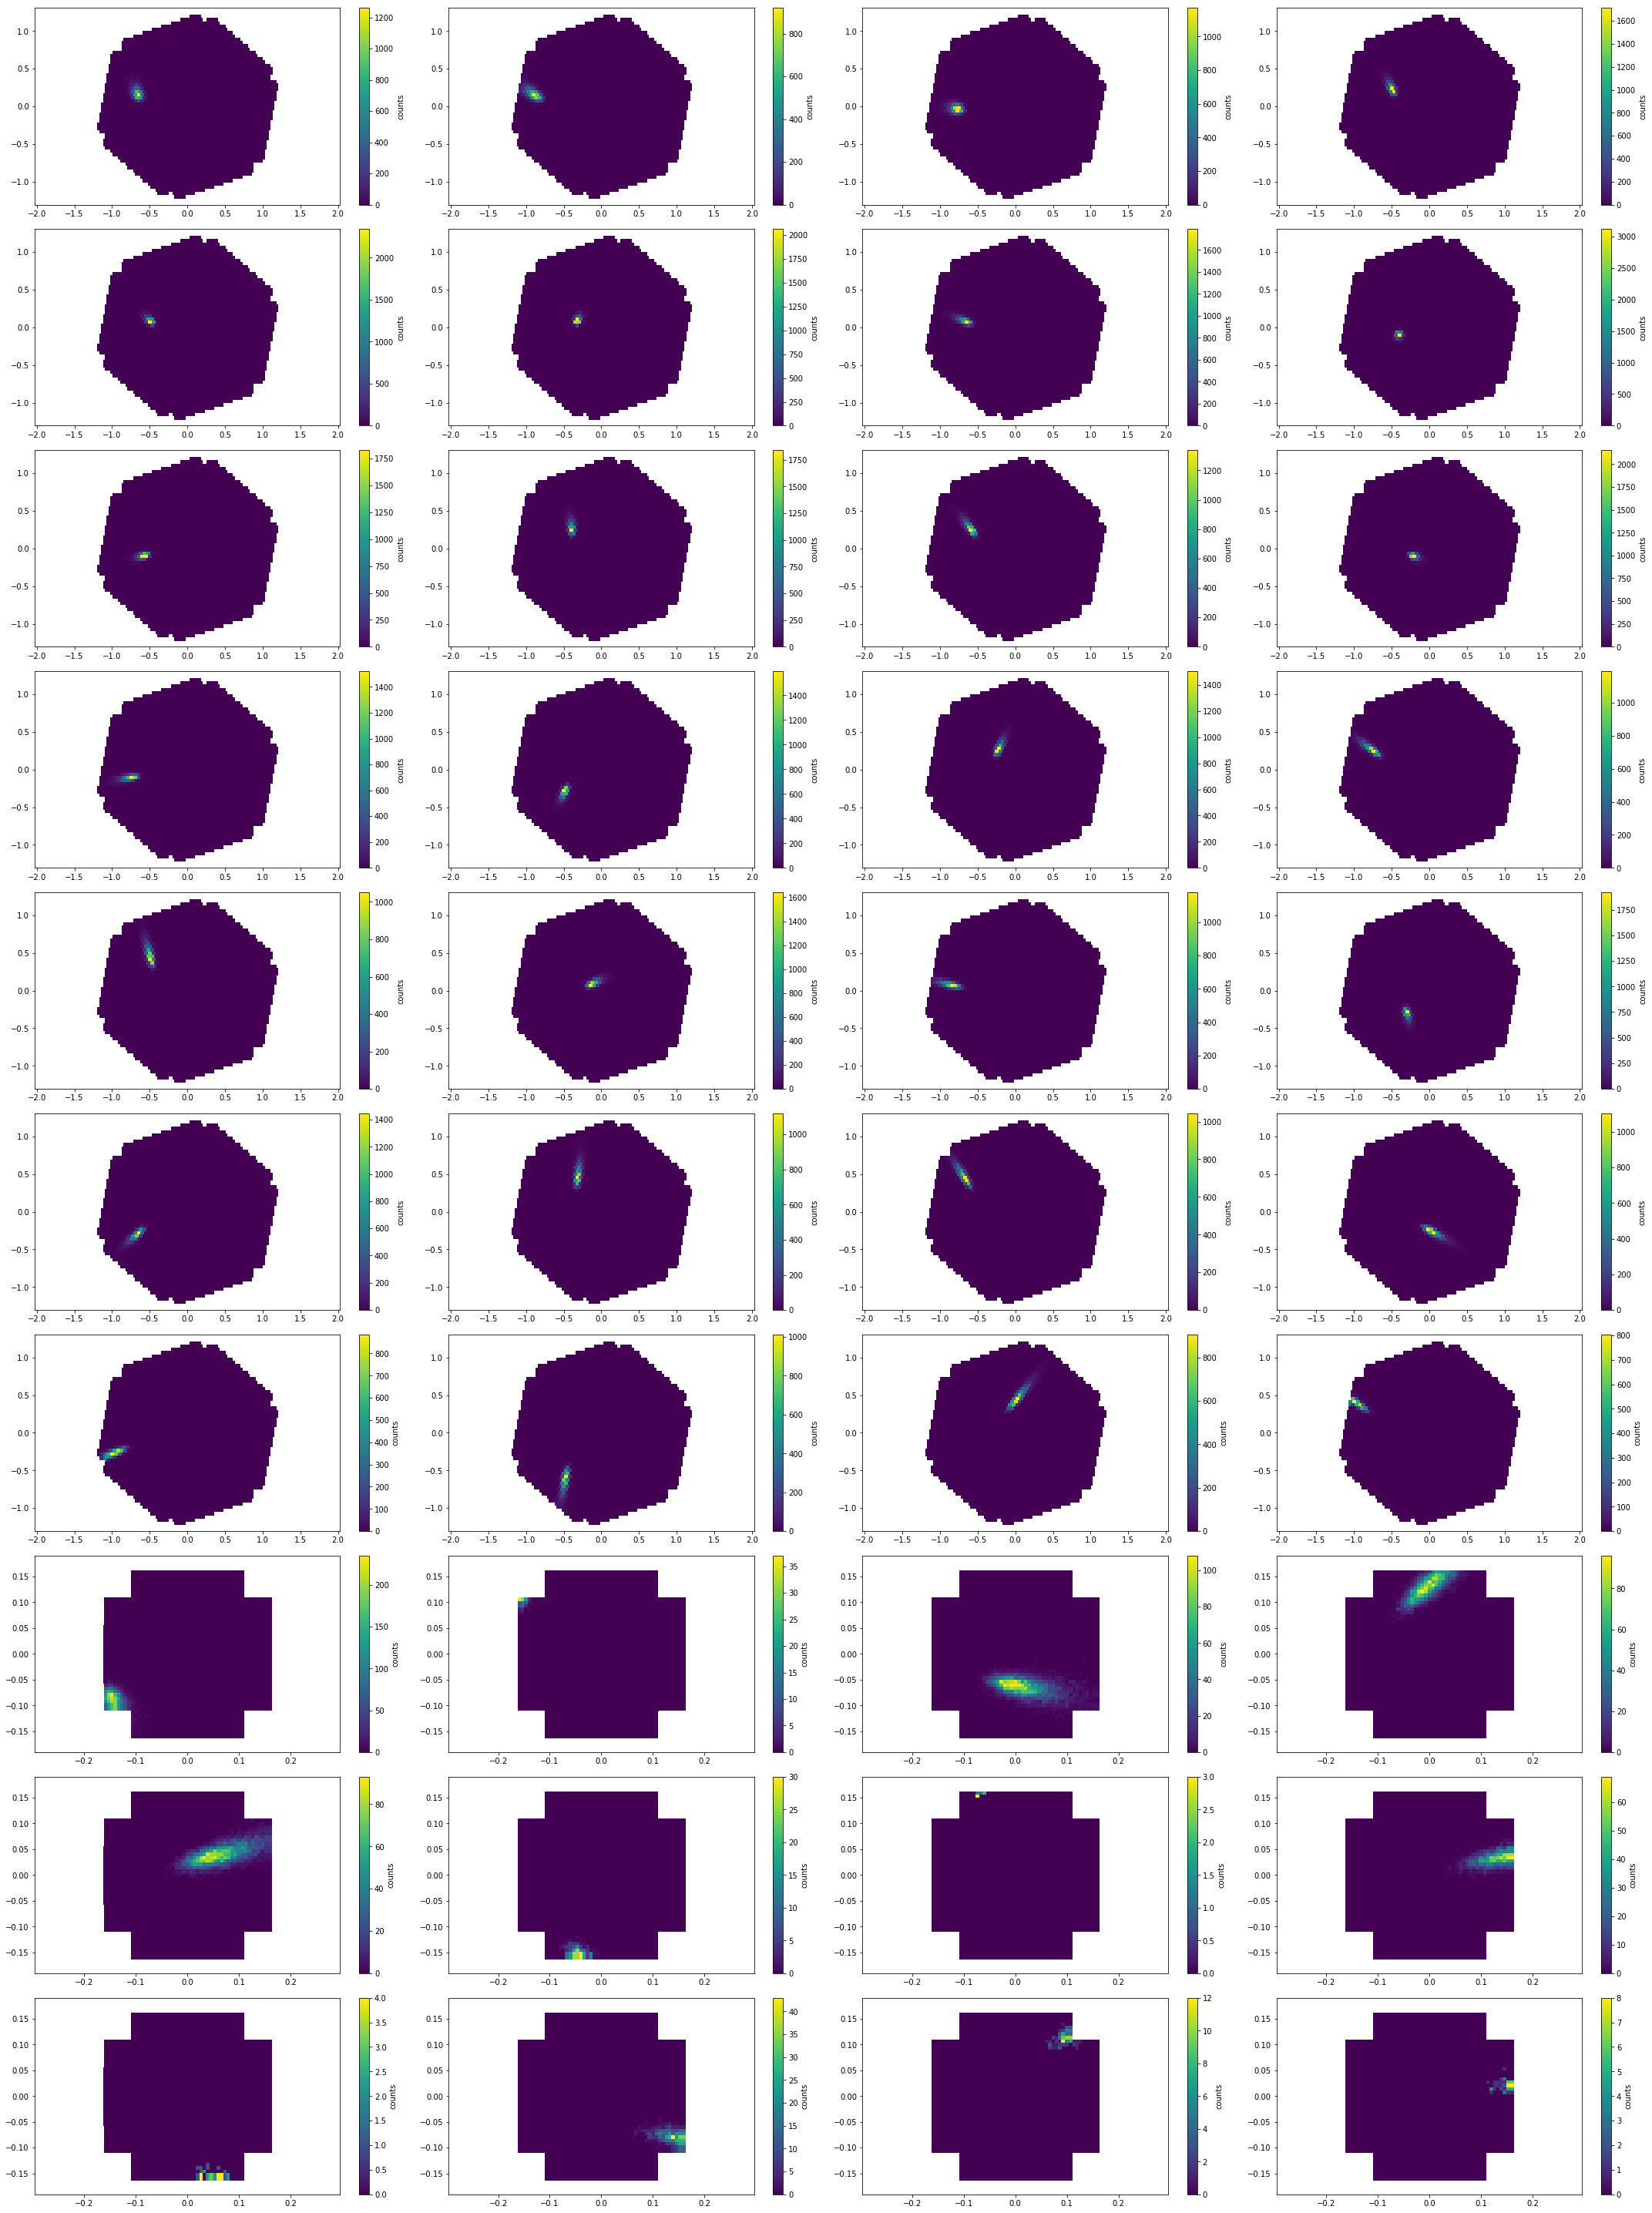

In [18]:
fig, axes = plt.subplots(len(triggered_telescopes)//4, 4, figsize=(30,40))
plt.tight_layout()
for ax,tel in zip(axes.flatten(),triggered_telescopes):
    ax = viz.display_camera_image(tel, ax=ax, s=81, marker='s')


# Convergent pointing

In [19]:
for tel in alltel:
    tel.pointing_object([ 385.07505115, 3191.2284824 , 8208.49342986]) # shower center

In [20]:
ci.array_shower_imaging(shower, alltel, noise)

In [21]:
triggered_telescopes = [tel for tel in alltel if tel.signal_hist.sum()>trigger_intensity]
print("{} telescopes triggered".format(len(triggered_telescopes)))

100 telescopes triggered


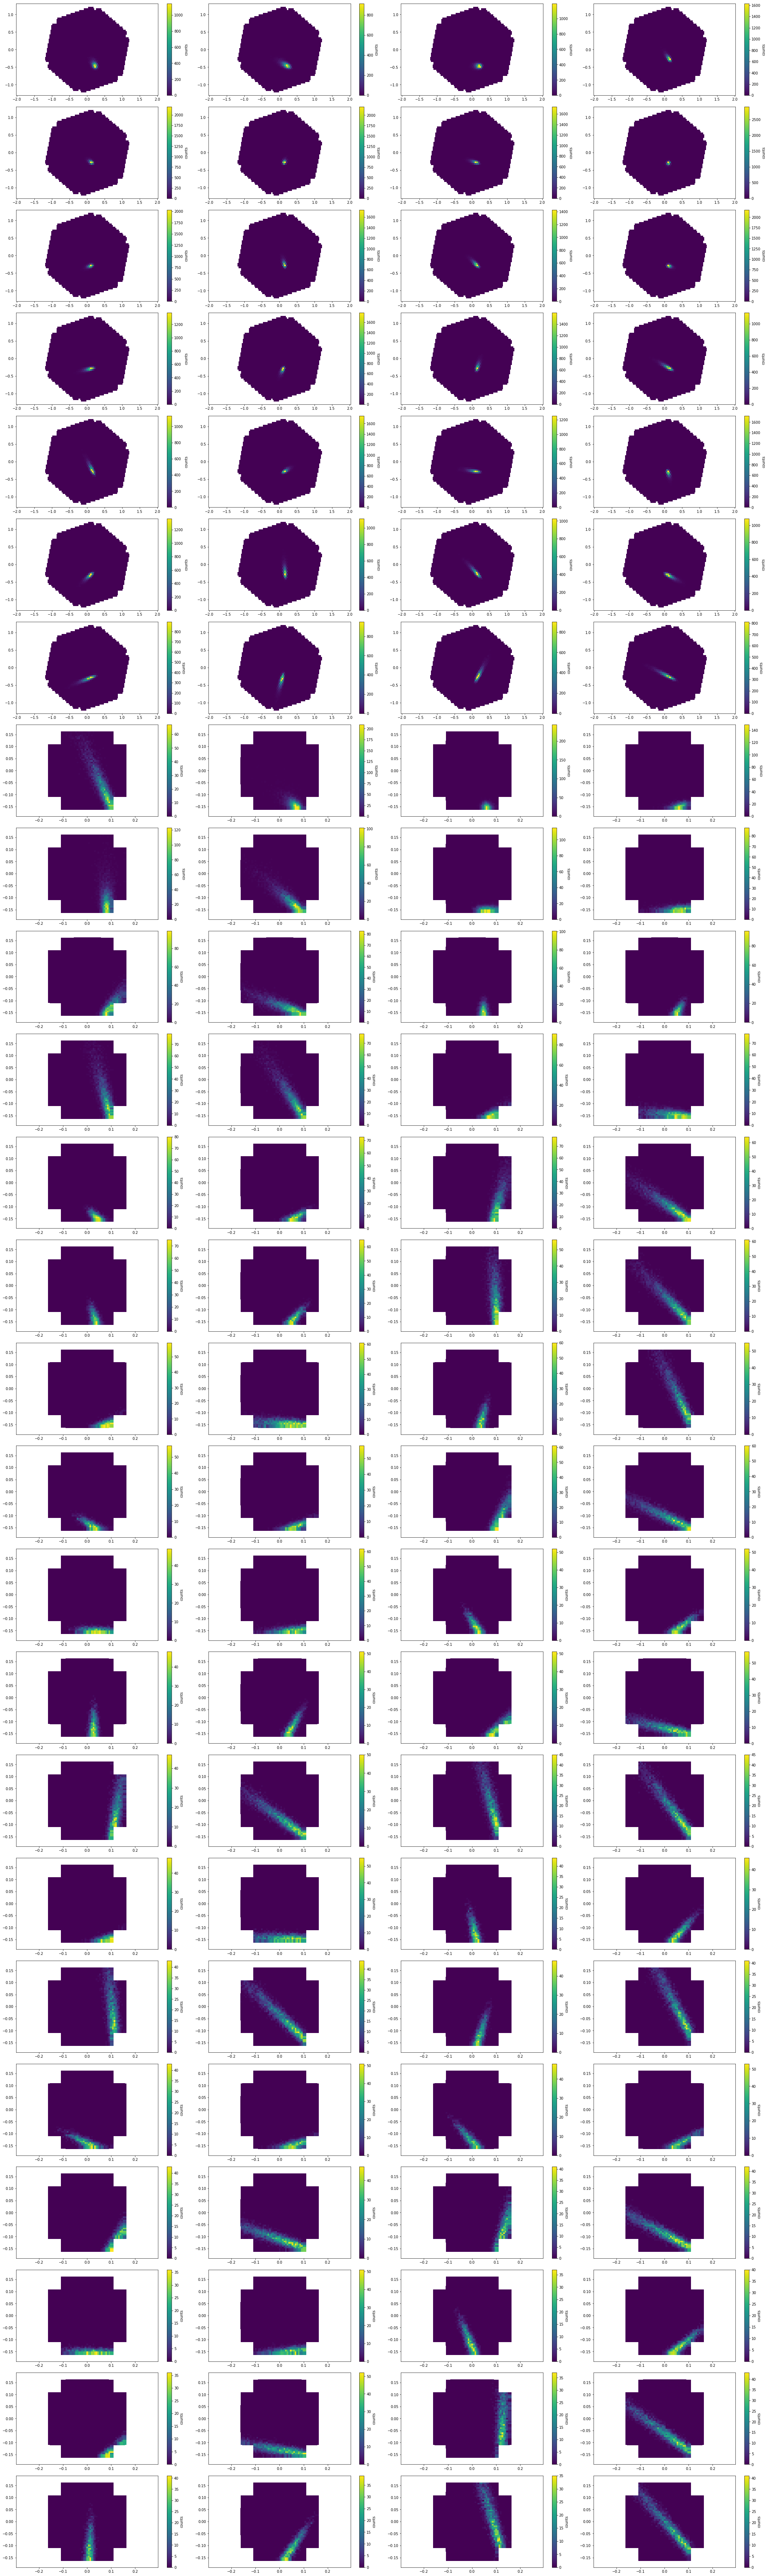

In [24]:
fig, axes = plt.subplots(len(triggered_telescopes)//4, 4, figsize=(30,100))
plt.tight_layout()
for ax,tel in zip(axes.flatten(),triggered_telescopes):
    ax = viz.display_camera_image(tel, ax=ax, s=81, marker='s')
